In [37]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [38]:
import pandas as pd
import numpy as np

# Load Data

In [39]:
df_path = 'salaries-by-region.csv'
df_region = pd.read_csv(df_path)
df_region.head()

,School_Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400,129000,68400.0,93100,184000,257000.0
1,California Institute of Technology (CIT),California,75500,123000,NaN,104000,161000,NaN
2,Harvey Mudd College,California,71800,122000,NaN,96000,180000,NaN
3,"University of California, Berkeley",California,59900,112000,59500.0,81000,149000,201000.0
4,Occidental College,California,51900,105000,NaN,54800,157000,NaN


In [40]:
#เนื่องจาก School_Name ไม่มีผลต่อการวิเคราะห์ข้อมูลจากทำการ drop
df = df_region.drop(columns = 'School_Name')
df.head()

,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,California,70400,129000,68400.0,93100,184000,257000.0
1,California,75500,123000,NaN,104000,161000,NaN
2,California,71800,122000,NaN,96000,180000,NaN
3,California,59900,112000,59500.0,81000,149000,201000.0
4,California,51900,105000,NaN,54800,157000,NaN


# Data Summarization and Exploration

In [41]:
#บอกจำนวน instant และ feature จากผลลัพธ์จะเห็นว่าทั้งหมดมี instant ทั้งหมด 320 ตัว และมี feature 7 ตัว
df.shape

(320, 7)

In [42]:
#ดูข้อมูลสถิติเบื้องต้น โดยผลลัพธ์ที่ได้จะประกอบไปด้วย จำนวน ค่าเฉลี่ย ส่วนเบี่ยงเบนมาตรฐาน ค่าต่ำสุด ค่าเปอร์เซ็นที่ 25 50 75 และค่าสูงสุดของแต่ละ feature
df.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,320.000000,320.000000,273.000000,320.000000,320.000000,273.000000
mean,46253.437500,83934.375000,45253.113553,60614.062500,116496.875000,160442.124542
std,6617.038001,15191.443091,8562.834333,11786.436432,24104.265214,36785.768186
min,34500.000000,43900.000000,25600.000000,31800.000000,60900.000000,85700.000000
25%,42000.000000,73725.000000,39500.000000,53100.000000,99825.000000,136000.000000
50%,45100.000000,82700.000000,43700.000000,59400.000000,113000.000000,154000.000000
75%,48900.000000,93250.000000,48900.000000,66025.000000,129000.000000,178000.000000
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000


In [43]:
#เพื่อดูข้อมูลเบื้องต้น ทำให้ทราบว่าข้อมูลมี instant 50 ตัว มี feature 8 ตัว มีข้อมูลที่เป็น float 2 ตัว int 4 ตัว และ object 1 ตัว 
#และสามารถดูได้ว่า feature ใดบ้างที่มี missing 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Region                             320 non-null    object 
 1   Starting Median Salary             320 non-null    int64  
 2   Mid-Career Median Salary           320 non-null    int64  
 3   Mid-Career 10th Percentile Salary  273 non-null    float64
 4   Mid-Career 25th Percentile Salary  320 non-null    int64  
 5   Mid-Career 75th Percentile Salary  320 non-null    int64  
 6   Mid-Career 90th Percentile Salary  273 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 17.6+ KB


# Cleaning data by missing

In [44]:
#เพื่อดูว่า feature ใดบ้างที่มี missing จากผลลัพธ์จะเห็นว่า feature 'Mid-Career 10th Percentile Salary' และ 
#'Mid-Career 90th Percentile Salary'มีค่าว่าง 47 ค่า
df.isnull().sum()

Region                                0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 10th Percentile Salary    47
Mid-Career 25th Percentile Salary     0
Mid-Career 75th Percentile Salary     0
Mid-Career 90th Percentile Salary    47
dtype: int64

In [45]:
#ให้ใส่ค่า mean ในช่องที่มี missing 
## Mid-Career 10th Percentile Salary
df['Mid-Career 10th Percentile Salary'].fillna((df['Mid-Career 10th Percentile Salary']).mean() , inplace=True)

In [46]:
## Mid-Career 90th Percentile Salary 
df['Mid-Career 90th Percentile Salary'].fillna((df['Mid-Career 90th Percentile Salary']).mean() , inplace=True)

In [47]:
#ใช้คำสั่ง isnull() อีกครั้งเพื่อดูว่ายังมี feature ใดบ้างที่มี missing อยู่ จากผลลัพธ์จะเห็นว่าทุก feature ไม่มี missing
df.isnull().sum()

Region                               0
Starting Median Salary               0
Mid-Career Median Salary             0
Mid-Career 10th Percentile Salary    0
Mid-Career 25th Percentile Salary    0
Mid-Career 75th Percentile Salary    0
Mid-Career 90th Percentile Salary    0
dtype: int64

# Cleaning data by nunique

In [48]:
#ให้ลบรายการที่ซ้ำออก เนื่องจากไม่มีค่าซ้ำจึงได้ instant 320 ตัว feature 7 ตัวเท่าเดิม 
df.drop_duplicates(inplace=True)
print(df.shape)

(320, 7)


# Cleaning data by dummy

In [49]:
#ดูว่าแต่ละ feature มี instant ที่ไม่มีแตกต่างกี่ค่า จากผลลัพธ์จะเห็นว่า feature 'Region' มีจำนวน instant ที่ไม่มีแตกต่างกัน 5 
#แต่เนื่องจาก Region เป็นค่า ground truth จึงไม่ได้ทำเป็น dummy
df.nunique()

Region                                 5
Starting Median Salary               168
Mid-Career Median Salary             204
Mid-Career 10th Percentile Salary    167
Mid-Career 25th Percentile Salary    217
Mid-Career 75th Percentile Salary    130
Mid-Career 90th Percentile Salary    116
dtype: int64

In [50]:
# Region เป็นค่า ground truth
df.head() 

,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,California,70400,129000,68400.000000,93100,184000,257000.000000
1,California,75500,123000,45253.113553,104000,161000,160442.124542
2,California,71800,122000,45253.113553,96000,180000,160442.124542
3,California,59900,112000,59500.000000,81000,149000,201000.000000
4,California,51900,105000,45253.113553,54800,157000,160442.124542


In [51]:
# Setting input features x and target output y
x = df.iloc[:,1:] #กำหนดให้ X เก็บทุก instant ยกเว้น feature แรก
y = df['Region'] #กำหนดให้ y เก็บทุก instant ใน feature 'Region'
n_class = len(np.unique(y)) ; print(n_class)
x.head()

5


,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,70400,129000,68400.000000,93100,184000,257000.000000
1,75500,123000,45253.113553,104000,161000,160442.124542
2,71800,122000,45253.113553,96000,180000,160442.124542
3,59900,112000,59500.000000,81000,149000,201000.000000
4,51900,105000,45253.113553,54800,157000,160442.124542


In [52]:
#ทำ scaler
scaler = StandardScaler() 
X_std = scaler.fit_transform(x)

# K-means

In [53]:
##Elbow method 
sse = [] #กำหนด list เปล่าเพื่อใส่ค่า sse
for i in range(1, 13): #เก็บค่า sse แต่ละโมเดลลงใน list ที่สร้างไว้ กำหนดให้ k เป็น 1-12 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0) #define model
    kmeans.fit(X_std) #fit model
    sse.append(kmeans.inertia_)  #เก็บค่า sse แต่ละ clusters ใน sse

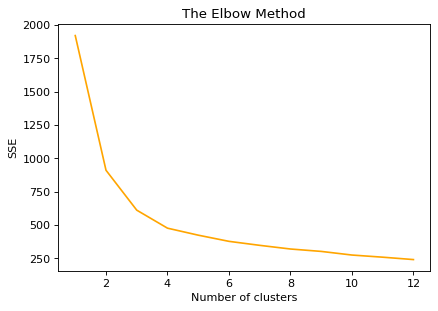

In [54]:
#จากภาพ จำนวน k จะเห็นว่า k=3 มีความเหมาะสมมากที่สุด
plt.figure(figsize=(6, 4), dpi=80)
plt.plot(range(1, 13), sse, color='orange')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [55]:
#ทดลองใช้ โดยกำหนด n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto") #define model
kmeans.fit(X_std) #fit model

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [56]:
#หา sse
kmeans.inertia_

612.9163938284436

In [57]:
#หา NMI
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y,kmeans.labels_) #เทียบค่า ground truth กับค่าที่ได้จากการ predic(fit mobel)

0.06177383279239934

In [58]:
#มี ลลัพธ์จะเห็นว่ามี 3 centroids โดย centroids ที่ 1 feature ที่ 1 คือ -0.67952893
kmeans.cluster_centers_ 

array([[-0.67952893, -0.78718051, -0.67127464, -0.76433759, -0.72563475,
        -0.62876388],
       [ 2.15133864,  1.91468751,  2.11003666,  2.04827563,  1.79754305,
         1.7974955 ],
       [ 0.22580412,  0.40067437,  0.22671522,  0.34348572,  0.36150578,
         0.25545424]])

In [59]:
#เป็นการบอกว่าแต่ละตัวอยู่ cluster ไหน
kmeans.labels_ 

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0,

# agglomerative

In [60]:
#agglomerative กำหนด n_clusters=3
clustering = AgglomerativeClustering(n_clusters=3, linkage = 'single') #define model 
clustering.fit(X_std) #fit model

AgglomerativeClustering(linkage='single', n_clusters=3)

In [61]:
##evaluation
#หา NMI
normalized_mutual_info_score(y,clustering.labels_) #เทียบค่า ground truth กับค่าที่ได้จากการ predic(fit mobel)

0.030494155655906668

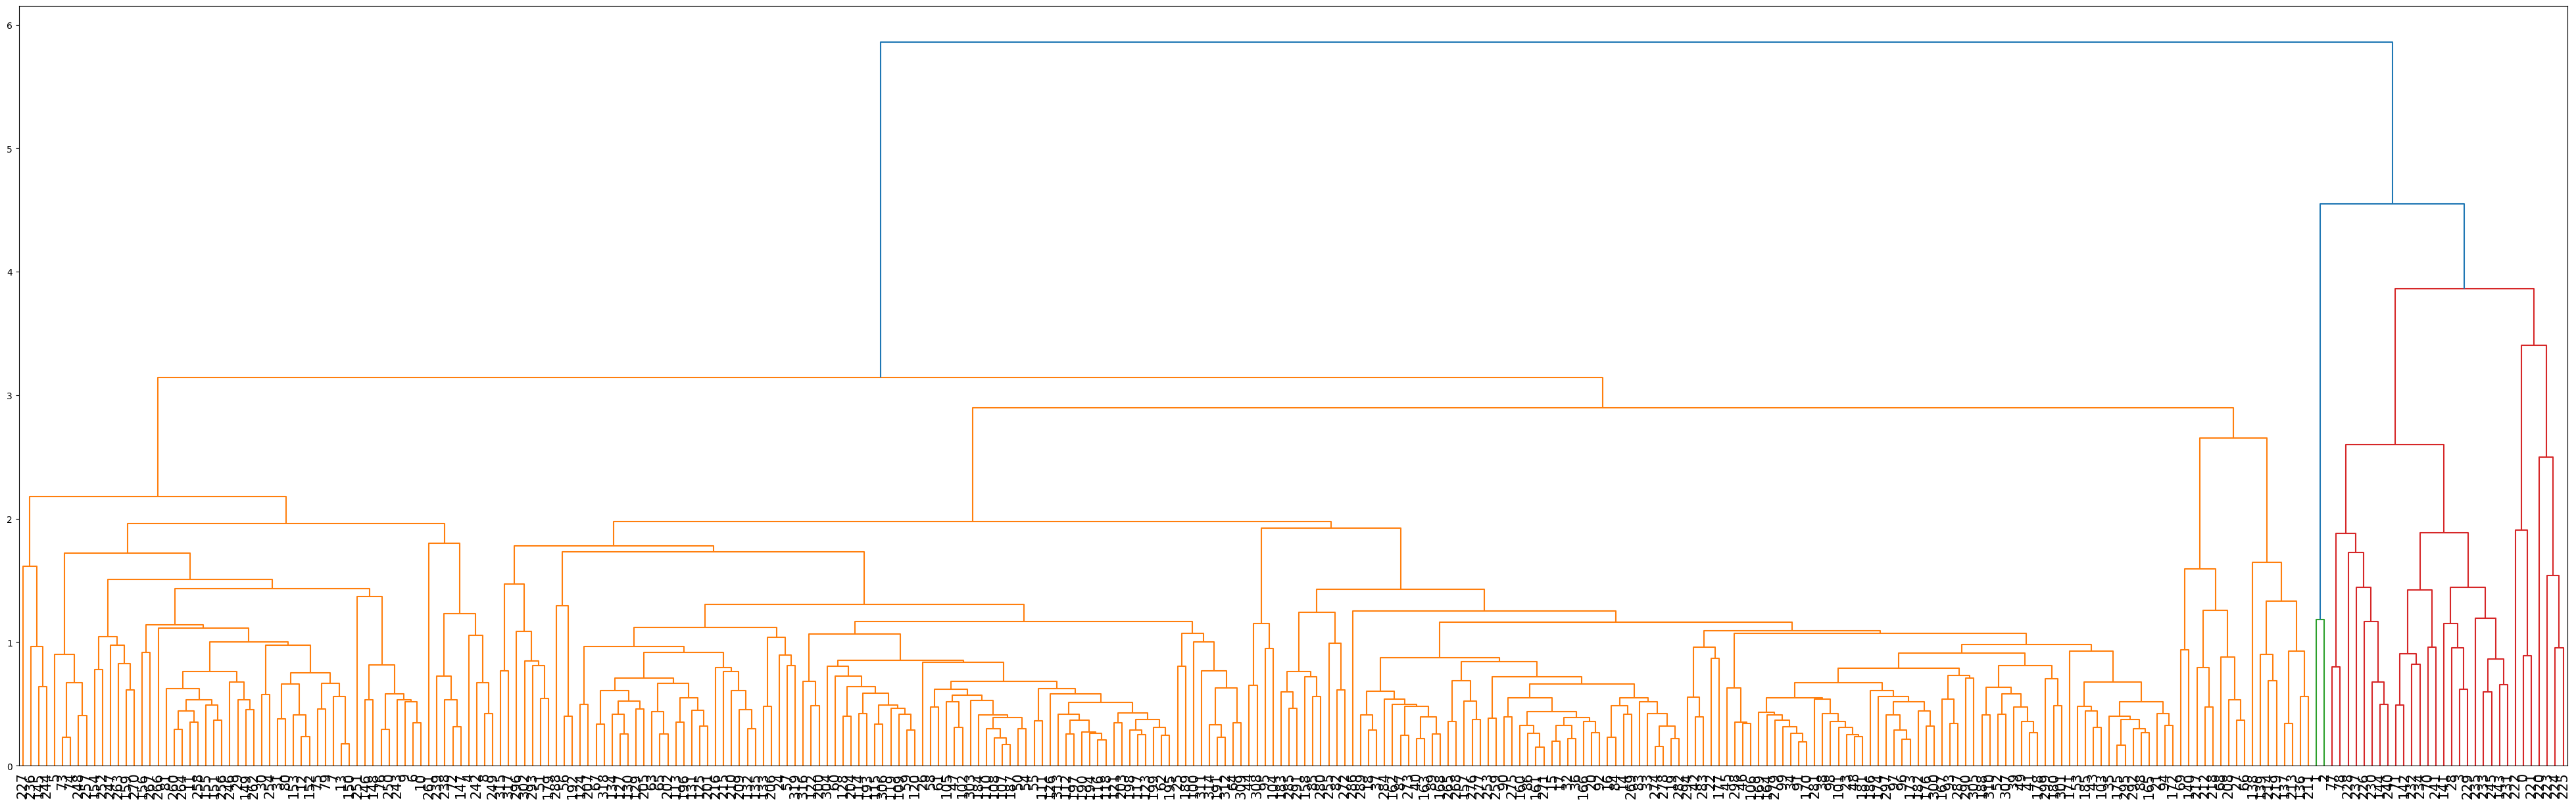

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(facecolor='w', figsize=(50,15))
dendrogram(linkage(X_std, method='average'), leaf_font_size=15)
plt.show()